<a href="https://colab.research.google.com/github/Saidul-1/CSE4132-Artificial-Intelligence-Lab/blob/main/Assighment7_CNN_Binary_Classifier_Lichi%26Mahogany_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Write a report in pdf format using any Latex system after:
● training and testing a CNN based classifier using images captured by you and
your group mates using mobile phones.
● mentioning total training time, testing time per sample, amount-of-data vs
performance, epoch vs performance, model size (i.e., number of parameters) vs
performance and some other observations that you think are interesting and
informative.

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom, RandomBrightness
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import time

In [ ]:
def preprocess_dataset():
  dataset = np.load('/content/drive/MyDrive/leaf_binary_dataset.npz')
  trainX = dataset['trainX']
  trainY = dataset['trainY']
  testX = dataset['testX']
  testY = dataset['testY']

  trainX = trainX.astype('float32')/255.0
  testX = testX.astype('float32')/255.0

  trainY = to_categorical(trainY, 2)
  testY = to_categorical(testY, 2)

  return (trainX, trainY), (testX, testY)

In [ ]:
def build_model(input_shape):
  inputs = Input(input_shape)

  # Augmentation
  x = RandomFlip()(inputs)
  x = RandomRotation(0.2)(x)
  x = RandomZoom(0.1)(x)

  x = Conv2D(32, (3, 3), activation='relu')(x)
  x = MaxPooling2D((2, 2))(x)
  x = Conv2D(64, (3, 3), activation='relu')(x)
  x = MaxPooling2D((2, 2))(x)
  x = Conv2D(128, (3, 3), activation='relu')(x)
  x = MaxPooling2D((2, 2))(x)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)

  outputs = Dense(2, activation = 'sigmoid')(x)

  model = Model(inputs, outputs)
  model.summary(show_trainable=True)
  model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
def train_model(my_model, trainX, trainY, training_epochs):
  history = my_model.fit(
      trainX, trainY,
      validation_split = 0.2,
      epochs = training_epochs,
  )
  return history

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Epoch vs Accuracy')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Epoch vs Loss')
    plt.legend()

    plt.show()

In [ ]:
def sample_prediction_plot(testX, testY_labels, predY_labels):
  class_names = ['Lichi_leaf', 'Mahogany_leaf']
  plt.figure(figsize=(10, 10))
  num_samples, rows, cols = 25, 5, 5
  for i in range(min(num_samples, len(testX))):
      plt.subplot(rows, cols, i+1)
      plt.axis('off')
      plt.imshow(testX[i])
      color = 'green' if(testY_labels[i] == predY_labels[i]) else 'red'
      plt.title(f'True: {class_names[testY_labels[i]]},\n Pred: {class_names[predY_labels[i]]}', color=color)
  plt.suptitle(f'Sample Predictions from Test Set')
  plt.tight_layout()
  plt.show()

In [ ]:
def main():
  (trainX, trainY), (testX, testY) = preprocess_dataset()
  print(trainX.shape)
  print(trainY.shape)

  model = build_model(trainX.shape[1:])

  start_train = time.time()
  history = train_model(model, trainX, trainY, 100)
  end_train = time.time()
  print(f'Training time: {end_train - start_train} seconds')

  plot_history(history)

  start_test = time.time()
  predY = model.predict(testX)
  end_test = time.time()
  test_time_per_sample = (end_test - start_test) / len(testX)
  print(f"Testing Time per Sample: {test_time_per_sample:.4f} seconds")

  predY_labels = np.argmax(predY, axis=1)
  testY_labels = np.argmax(testY, axis=1)
  sample_prediction_plot(testX, testY_labels, predY_labels)
  accuracy = accuracy_score(testY_labels, predY_labels)
  print(f'Accuracy: {accuracy}')

(1031, 224, 224, 3)
(1031, 2)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer_6 (InputLayer)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ random_flip_6 (RandomFlip)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ random_rotation_6           │ (None, 224, 224, 3)   │          0 │   -   │
│ (RandomRotation)            │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ random_zoom_6 (RandomZoom)  │ (None, 224, 224, 3)   │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_18 (Conv2D)          │ (None, 222, 222, 32)  │        896 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_17            │ (None, 111, 111, 32)  │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_19 (Conv2D)          │ (None, 109, 109, 64)  │     18,496 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_18            │ (None, 54, 54, 64)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_20 (Conv2D)          │ (None, 52, 52, 128)   │     73,856 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_19            │ (None, 26, 26, 128)   │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_6 (Flatten)         │ (None, 86528)         │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_12 (Dense)            │ (None, 128)           │ 11,075,712 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_13 (Dense)            │ (None, 2)             │        258 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.5251 - loss: 0.7137 - val_accuracy: 0.5217 - val_loss: 0.6919
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.4926 - loss: 0.6937 - val_accuracy: 0.4783 - val_loss: 0.6945
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5231 - loss: 0.6914 - val_accuracy: 0.4783 - val_loss: 0.7025
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5353 - loss: 0.6879 - val_accuracy: 0.4831 - val_loss: 0.6920
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5543 - loss: 0.6831 - val_accuracy: 0.4879 - val_loss: 0.6885
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5056 - loss: 0.6876 - val_accuracy: 0.4734 - val_loss: 0.6918
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5593 - loss: 0.6720 - val_accuracy: 0.6667 - val_loss: 0.6669
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6463 - loss: 0.6565 - val_accuracy: 0.

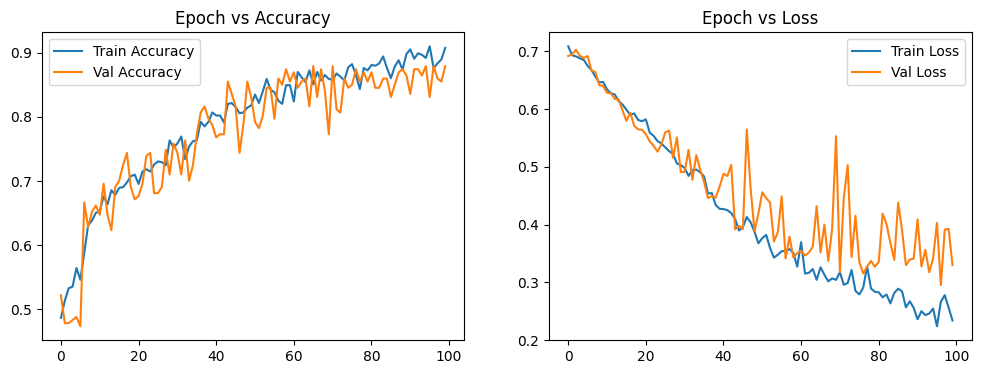

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Testing Time per Sample: 0.0036 seconds


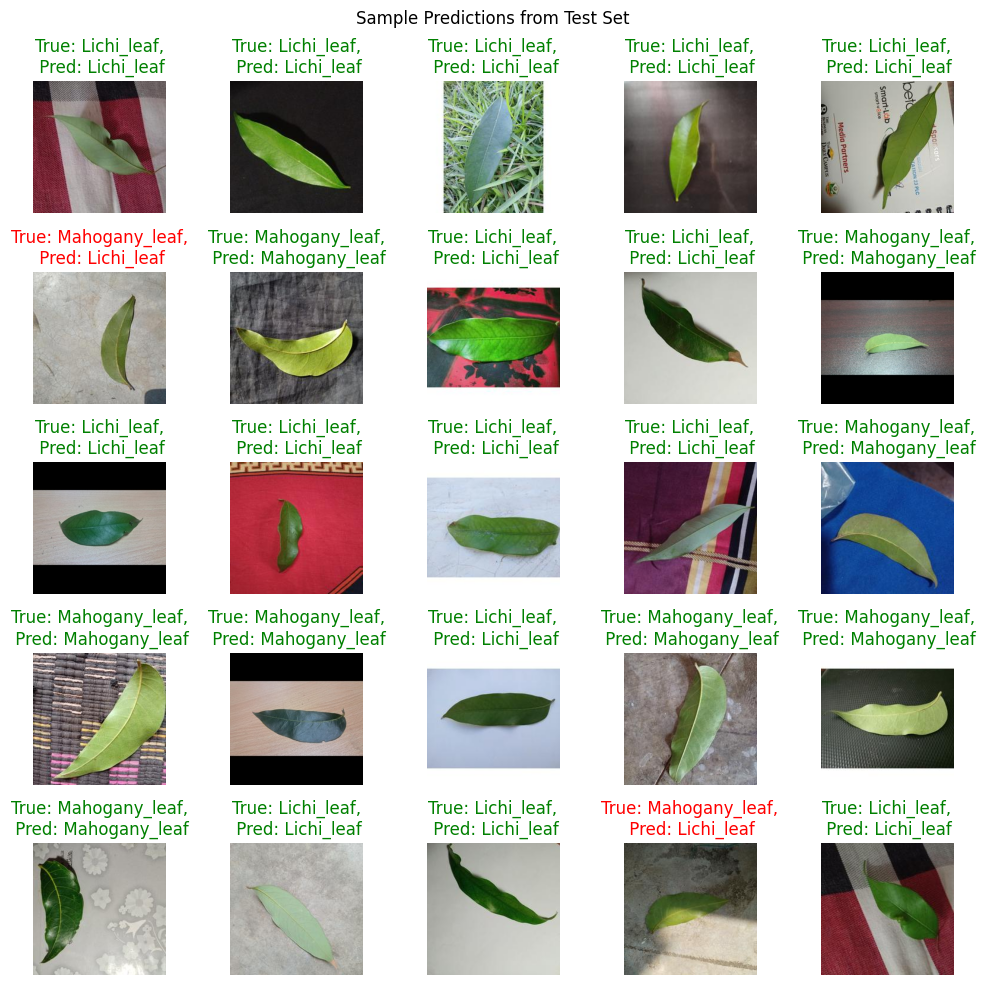

Accuracy: 0.8333333333333334


In [ ]:
if __name__ == '__main__':
    main()